In [35]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as matplot
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import requests
import json
from pandas.plotting import register_matplotlib_converters

In [2]:
# Load second Dataset with Corona Cases
payload = {"code": "ALL"}
URL = "https://api.statworx.com/covid"
response = requests.post(url=URL, data=json.dumps(payload))
df_covid = pd.DataFrame.from_dict(json.loads(response.text))
# df_covid = df_covid[df_covid['code'] == 'US']

In [3]:
# add the date column as variable
df_covid["Date"] = pd.to_datetime(df_covid["date"])

In [4]:
# delete some columns that we won't use
df_covid.drop(
    ["day", "month", "year", "country", "code", "population", "date"],
    axis=1,
    inplace=True,
)

In [5]:
# Summarize cases over all countries
df_covid = df_covid.groupby(["Date"]).sum()
df_covid.head()

,cases,deaths,cases_cum,deaths_cum
Date,,,,
2019-12-31,27,0,27,0
2020-01-01,0,0,27,0
2020-01-02,0,0,27,0
2020-01-03,17,0,44,0
2020-01-04,0,0,44,0


In [31]:
df_covid_new = df_covid.copy()

# Read the data for different assets
today_date = datetime.today().strftime("%Y-%m-%d")
start_date = "2020-01-01"
end_date = "2021-07-30"
asset_dict = {
    "^GSPC": "SP500",
    "QQQ": "NASDAQ",
    "UAL": "UNITED AIRLINES",
    "AAL": "AmericanAirlines",
    "NFLX": "Netflix",
    "V": "VISA",
    "PYPL": "PAYPAL",
    "SQ": "SQUARE",
    "AMZN": "Amazon",
    "AAPL": "Apple",
    "MSFT": "Microsoft",
    "GOOG": "Google",
    "AMD": "AMD",
    "BTC-USD": "BTCUSD",
    "ETH-USD": "ETHUSD",
    "CL=F": "Oil",
    "GC=F": "Gold",
    #"SM=F": "Soybean",
    "ZB=F": "UsTreasuryBond",
    "EURUSD=X": "EUR / USD",
    "GBPUSD=X": "GBP / USD"}

col_list = []
# Join the dataframes
for key, value in asset_dict.items():
    print(key, value)    
    try:
        df_temp = web.DataReader(
            key, start=start_date, end=today_date, data_source="yahoo")
    except ValueError: 
        print(f' {key} symbol not found')
    # convert index to Date Format
    df_temp.index = pd.to_datetime(df_temp.index) 
    df_temp.rename(columns={"Close": value}, inplace=True) # Rename Close Column       
    df_covid_new = pd.merge(
        left=df_covid_new,
        right=df_temp[value],
        how="inner",
        left_index=True, right_index=True)     

df_covid_new.tail()

^GSPC SP500
QQQ NASDAQ
UAL UNITED AIRLINES
AAL AmericanAirlines
NFLX Netflix
V VISA
PYPL PAYPAL
SQ SQUARE
AMZN Amazon
AAPL Apple
MSFT Microsoft
GOOG Google
AMD AMD
BTC-USD BTCUSD
ETH-USD ETHUSD
CL=F Oil
GC=F Gold
ZB=F UsTreasuryBond
EURUSD=X EUR / USD
GBPUSD=X GBP / USD


,cases,deaths,cases_cum,deaths_cum,SP500,NASDAQ,UNITED AIRLINES,AmericanAirlines,Netflix,VISA,...,Microsoft,Google,AMD,BTCUSD,ETHUSD,Oil,Gold,UsTreasuryBond,EUR / USD,GBP / USD
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-08,526221,8360,67682877,1545787,3702.250000,308.290009,49.040001,17.629999,512.659973,212.770004,...,216.009995,1818.550049,92.919998,18321.144531,554.827759,45.599998,1870.800049,172.093994,1.211314,1.335738
2020-12-09,626355,12642,68309232,1558429,3672.820068,301.309998,48.020000,17.160000,493.600006,209.580002,...,211.800003,1784.130005,89.830002,18553.916016,573.479126,45.520000,1834.599976,171.500000,1.211094,1.336559
2020-12-10,676114,12376,68985346,1570805,3668.100098,302.519989,49.639999,17.990000,501.089996,207.610001,...,210.520004,1775.329956,91.660004,18264.992188,559.678528,46.779999,1833.599976,172.468994,1.207875,1.336702
2020-12-11,693352,12327,69678698,1583132,3663.459961,301.850006,48.360001,17.049999,503.220001,206.240005,...,213.259995,1781.770020,91.650002,18058.904297,545.797363,46.570000,1839.800049,172.625000,1.214429,1.330566
2020-12-14,540659,7085,69772343,1565202,3647.489990,304.040009,46.720001,16.700001,522.419983,207.250000,...,214.199997,1760.060059,94.779999,19246.644531,586.011169,46.990002,1828.699951,172.656006,1.213340,1.331824


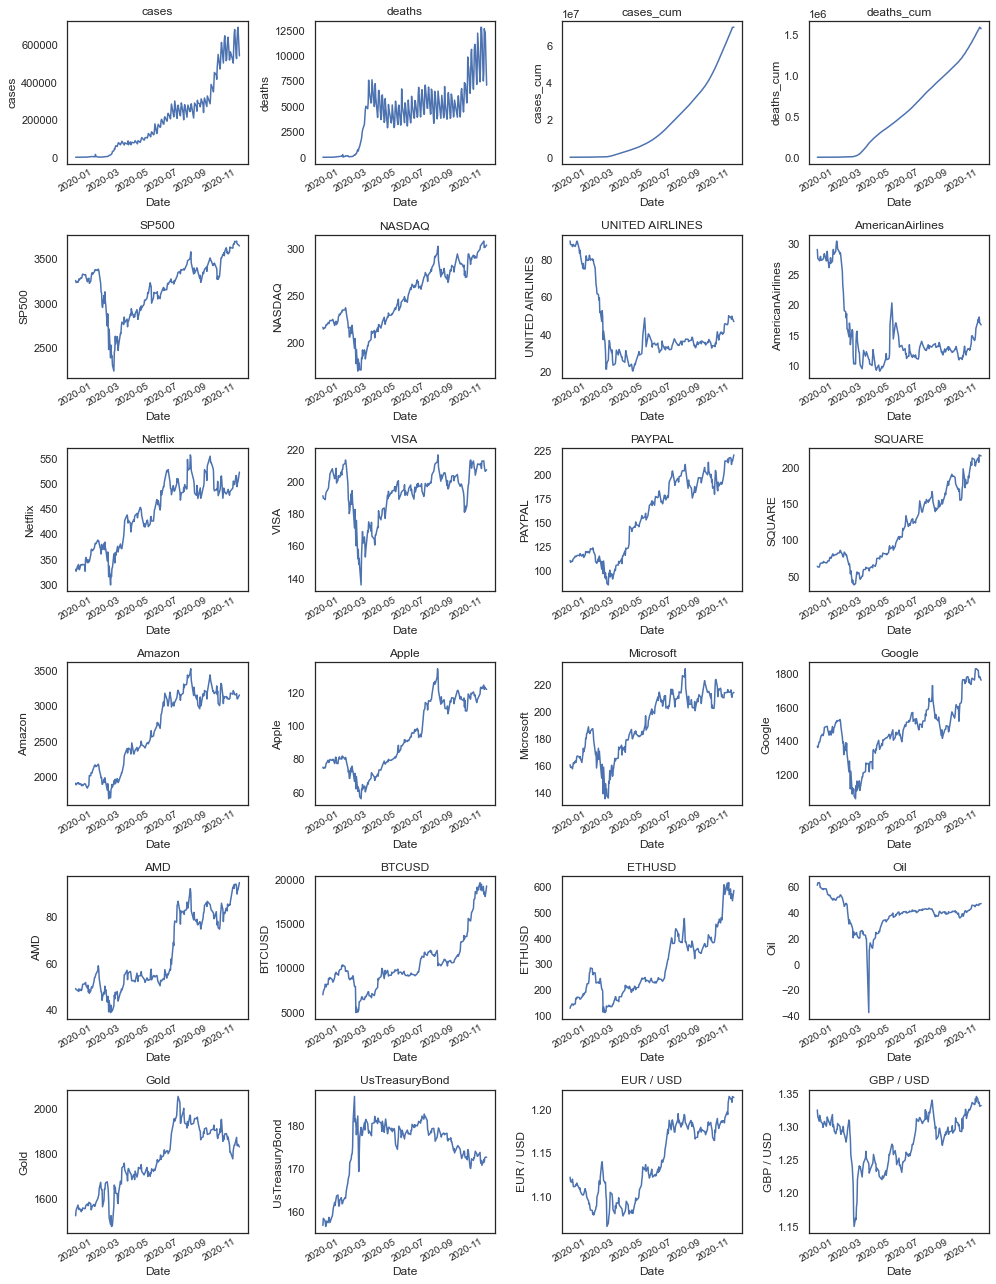

In [32]:
# Plot histograms
df_plot = df_covid_new.copy()

list_length = df_plot.shape[1]
ncols = 4
nrows = int(round(list_length / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
        ax = plt.subplot(nrows,ncols,i+1)
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.set_title(df_plot.columns[i])
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

In [33]:
# Plotting a diagonal correlation matrix
sns.set(style="white")

# Compute the correlation matrix
df = pd.DataFrame(df_covid_new, columns=col_list)
corr = df_covid_new.corr()
corr

,cases,deaths,cases_cum,deaths_cum,SP500,NASDAQ,UNITED AIRLINES,AmericanAirlines,Netflix,VISA,...,Microsoft,Google,AMD,BTCUSD,ETHUSD,Oil,Gold,UsTreasuryBond,EUR / USD,GBP / USD
cases,1.000000,0.858614,0.972546,0.967128,0.648148,0.852320,-0.337855,-0.420631,0.758866,0.444214,...,0.775376,0.790788,0.859208,0.895307,0.899162,0.053269,0.728090,0.174125,0.842242,0.488718
deaths,0.858614,1.000000,0.781825,0.813045,0.390016,0.671051,-0.560671,-0.604307,0.722017,0.224332,...,0.663966,0.568775,0.707738,0.710752,0.726709,-0.251072,0.685140,0.428410,0.634737,0.224053
cases_cum,0.972546,0.781825,1.000000,0.974244,0.699108,0.864522,-0.245385,-0.331528,0.725498,0.495943,...,0.752670,0.806322,0.891174,0.920493,0.930776,0.124142,0.688272,0.083899,0.862660,0.559339
deaths_cum,0.967128,0.813045,0.974244,1.000000,0.693596,0.917138,-0.371581,-0.449042,0.844415,0.510301,...,0.850159,0.800045,0.921488,0.873734,0.924605,0.073528,0.811012,0.221314,0.897898,0.502486
SP500,0.648148,0.390016,0.699108,0.693596,1.000000,0.879133,0.307231,0.225890,0.583335,0.932472,...,0.780692,0.940684,0.766253,0.788867,0.782290,0.626231,0.543702,-0.354145,0.734626,0.858099
NASDAQ,0.852320,0.671051,0.864522,0.917138,0.879133,1.000000,-0.163887,-0.236777,0.877639,0.762173,...,0.959582,0.915545,0.929090,0.839661,0.908216,0.305122,0.828645,0.074912,0.893326,0.662592
UNITED AIRLINES,-0.337855,-0.560671,-0.245385,-0.371581,0.307231,-0.163887,1.000000,0.977424,-0.538199,0.373648,...,-0.305003,0.112052,-0.253007,-0.049700,-0.182087,0.742002,-0.539673,-0.912567,-0.212062,0.458653
AmericanAirlines,-0.420631,-0.604307,-0.331528,-0.449042,0.225890,-0.236777,0.977424,1.000000,-0.585025,0.321394,...,-0.354857,0.029294,-0.324800,-0.133192,-0.258521,0.681041,-0.598461,-0.884894,-0.297744,0.359238
Netflix,0.758866,0.722017,0.725498,0.844415,0.583335,0.877639,-0.538199,-0.585025,1.000000,0.472400,...,0.938374,0.670906,0.826381,0.622102,0.752127,-0.056512,0.916555,0.466288,0.764377,0.317505
VISA,0.444214,0.224332,0.495943,0.510301,0.932472,0.762173,0.373648,0.321394,0.472400,1.000000,...,0.699783,0.854641,0.599897,0.637625,0.624659,0.680878,0.419961,-0.368957,0.574618,0.762040


<ipython-input-34-3dfc6069e981>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

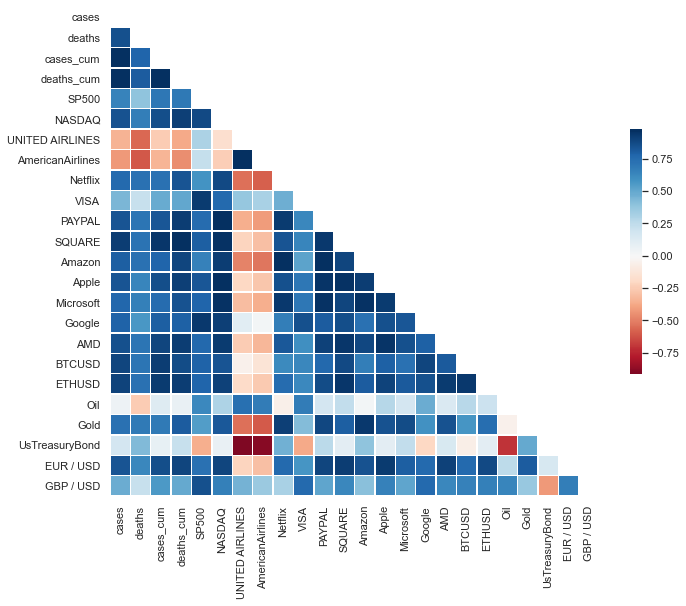

In [34]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = "RdBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)